### Numpy basics

In [2]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import time

%cd ./04_data

/Users/darioliotta/Documents/Physics of Data/Laboratory of Computational Physics/Exercises/04_data


1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
m = np.arange(12).reshape((3, 4))

row_means = np.mean(m, axis=1)
column_means = np.mean(m, axis=0)
overall_mean = np.mean(m)

print("Matrix:")
print(m)
print("\nRow Means:", row_means)
print("Column Means:", column_means)
print("Overall Mean:", overall_mean)

Matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Row Means: [1.5 5.5 9.5]
Column Means: [4. 5. 6. 7.]
Overall Mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [3]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#Using function outer
print("Result using the outer function:")
print(np.outer(u, v))

print("\n")

#Using a nested for loop
product = []

for i in u:
    for j in v:
        product.append(i * j)
        
product = np.array(product)
product = product.reshape(u.shape[0], v.shape[0])
print("Result using a nested loop:")
print(product)

print("\n")

#Using broadcasting operations
product = u[:, np.newaxis] * v   #Transposing u array and doing the broadcasting product with v
print("Result broadcasting operations:")
print(product)

Result using the outer function:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


Result using a nested loop:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


Result broadcasting operations:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [11]:
np.set_printoptions(precision = 2)  #To make the output more readable

m = np.random.random((10, 6))
print("Matrix:")
print(m)

print('\t')

m[np.any(m < 0.1, axis=1)] = 0
print("Setting rows with any entry less than 0.1 to be zero:")
print(m)

Matrix:
[[0.26 0.81 0.89 0.69 0.07 0.93]
 [0.83 0.02 0.02 0.91 0.12 0.03]
 [0.33 0.33 0.14 0.78 0.82 0.49]
 [0.14 0.37 0.6  0.73 0.12 0.31]
 [0.62 0.9  0.74 0.88 0.51 0.01]
 [0.61 0.5  0.07 0.69 0.64 0.18]
 [0.6  0.17 0.43 0.7  0.35 0.72]
 [0.26 0.11 0.92 0.42 0.74 0.65]
 [0.7  0.56 0.16 0.71 0.8  0.76]
 [0.77 0.21 0.48 0.47 0.93 0.04]]
	
Setting rows with any entry less than 0.1 to be zero:
[[0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.33 0.33 0.14 0.78 0.82 0.49]
 [0.14 0.37 0.6  0.73 0.12 0.31]
 [0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.  ]
 [0.6  0.17 0.43 0.7  0.35 0.72]
 [0.26 0.11 0.92 0.42 0.74 0.65]
 [0.7  0.56 0.16 0.71 0.8  0.76]
 [0.   0.   0.   0.   0.   0.  ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

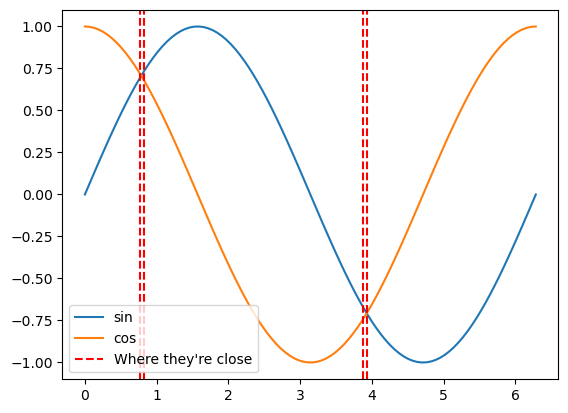

In [12]:
#Creating the array
m = np.linspace(0, 2*pi, 100)

#Extracting every 10th element
extract_10ths = m[9::10]

#Reversing the array
reverse = m[::-1]

#Extracting when |sin(x)-cos(x)|<0.1
def diff(x):
    return abs(np.sin(x) - np.cos(x))

extract_diff = m[diff(m) < 0.1]

#Making the plot
plt.plot(m, np.sin(m), label = 'sin')
plt.plot(m, np.cos(m), label = 'cos')

for x_close in extract_diff:
    plt.axvline(x_close, color = 'red', linestyle = '--')
plt.plot([], [], 'r--', label = "Where they're close")  #If we had added the label in plt.axvline it would have been added as many times as the number of cycles
    
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [18]:
a = np.arange(1, 11)
a = np.outer(a, a)
print('10 by 10 multiplication table:')
print(a)

print('\t')

#Trace
print("Trace:", np.trace(a))

#Anto-diagonal
print("Anto-diagonal:", np.diagonal(np.fliplr(a))) #np.fliplr flips the matrix horizontally (left to right)

#Diagonal offset by 1 upwards
print("Diagonal offset by 1 upwards:", np.diagonal(a, offset=1))

10 by 10 multiplication table:
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
	
Trace: 385
Anto-diagonal: [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [24]:
np.set_printoptions(precision = 1)  #To make the output more readable

cities = {"Chicago" : 0, "Springfield" : 198, "Saint-Louis" : 303, "Tulsa" : 736, "Oklahoma City" : 871, "Amarillo" : 1175, "Santa Fe" : 1475, "Albuquerque" : 1544, "Flagstaff" : 1913, "Los Angeles" : 2448}

distances = np.array(list(cities.values()))
distances = abs(distances - distances[:, np.newaxis])
print("Matrix of distances:")
print(distances)

#Converting it in km
distances = 1.60934 * distances
print("\nIn kilometers:")
print(distances)

Matrix of distances:
[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

In kilometers:
[[   0.   318.6  487.6 1184.5 1401.7 1891.  2373.8 2484.8 3078.7 3939.7]
 [ 318.6    0.   169.   865.8 1083.1 1572.3 2055.1 2166.2 2760.  3621. ]
 [ 487.6  169.     0.   696.8  914.1 1403.3 1886.1 1997.2 2591.  3452. ]
 [1184.5  865.8  696.8    0.   217.3  706.5 1189.3 1300.3 1894.2 2755.2]
 [1401.7 1083.1  914.1  217.3    0.   489.2  972.  1083.1 1676.9 2537.9]
 [1891.  1572.3 1403.3  706.5  489.2    0.   482.8  593.8 1187.7 20

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

Array of prime numbers: [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


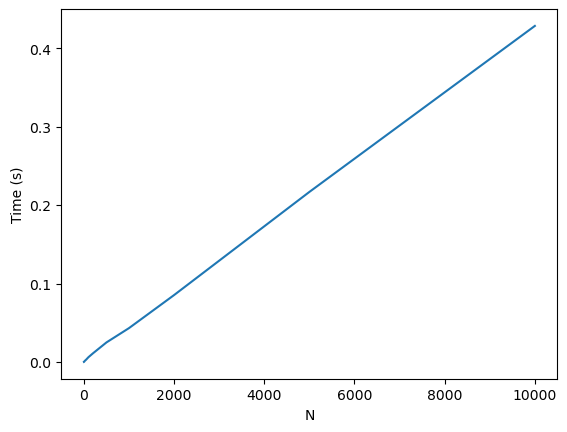

In [4]:
def primes(N):
    sieve = np.ones((N,), dtype = bool)  #Inizializing the array
    sieve[:2] = False                    #0 and 1 are not primes
    for i in range (2, N):               #Going through all numbers
        sieve[i*i :: i] = False          #Excluding all non-primes numbers
    return np.arange(0, N)[sieve]        #Returning the array of prime numbers

N = 100
print('Array of prime numbers:', primes(N))

#Measuring the time it occurs to use primes function with an input N
def how_much_time(f, N):
    start = time.time()
    f(N)
    end = time.time()
    return end - start

scale = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
times = [how_much_time(primes, N * i) for i in scale]

plt.plot(scale, times)
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.show()

The time seems to increase linearly with respect to N.

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


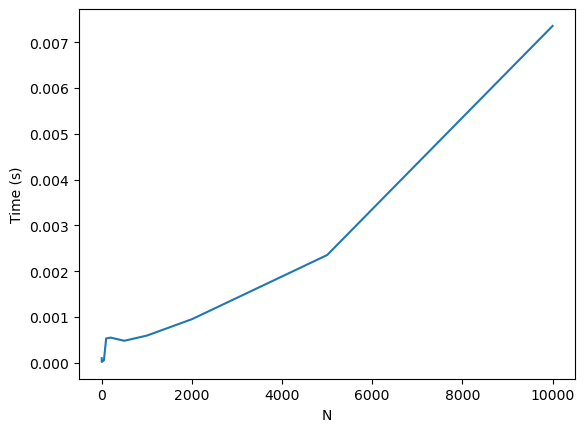

In [23]:
def eratosthenes(N):
    sieve = np.ones((N,), dtype = bool)
    sieve[:2] = False
    for i in range(2, int(np.sqrt(N))):
        if sieve[i]:
            sieve[i*i : N : i] = False
    return np.arange(0, N)[sieve]

print(eratosthenes(N))

times = [how_much_time(eratosthenes, N * i) for i in scale]

plt.plot(scale, times)
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.show()

The growth seems slightly larger than the linear one. Anyway, as we can notice from the values on the y axis, this version of the sieve method is far more efficient (by two orders of magnitude).

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

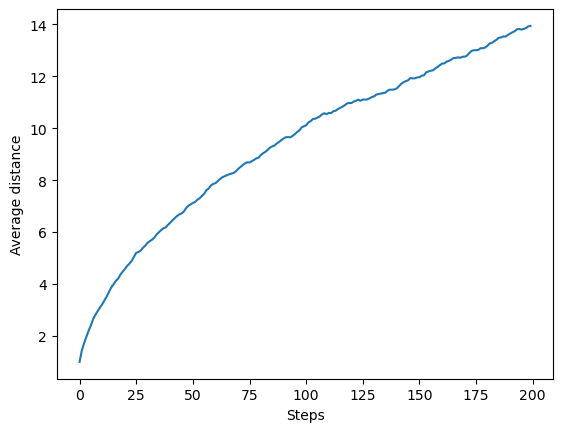

In [36]:
walkers, steps = 1000, 200

#randint(2) creates a random array made by 0 and 1
run = np.random.randint(2, size = (walkers, steps))

#We want it to be made of -1 and 1
run[run == 0] = -1

#Creating the walking distances array; each element is the sum of the previous ones in the same row
distances = np.cumsum(run, axis = 1)

#Computing the square
distances = distances ** 2

#Computing the mean along each column
distances = np.mean(distances, axis = 0)
        
#Plot
plt.plot(np.sqrt(distances))
plt.xlabel('Steps')
plt.ylabel('Average distance')
plt.show()

The curve is what we expected, as it follows the same growth ($\sim\sqrt{x}$).

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

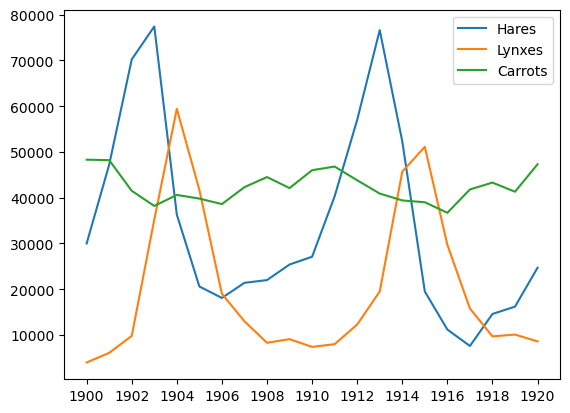

Statistics: [hares, lynxes, carrots]
Means: [34081.  20166.7 42400. ]
Standard deviations: [20897.9 16254.6  3322.5]
Correlation coefficients:
 [[ 1.   0.1 -0. ]
 [ 0.1  1.  -0.7]
 [-0.  -0.7  1. ]]
Medians: [25400. 12300. 41800.]
Minimum values: [ 7600.  4000. 36700.]
Maximus values: [77400. 59400. 48300.]
Highest population in year 1900: Carrots
Highest population in year 1901: Carrots
Highest population in year 1902: Hares
Highest population in year 1903: Hares
Highest population in year 1904: Lynxes
Highest population in year 1905: Lynxes
Highest population in year 1906: Carrots
Highest population in year 1907: Carrots
Highest population in year 1908: Carrots
Highest population in year 1909: Carrots
Highest population in year 1910: Carrots
Highest population in year 1911: Carrots
Highest population in year 1912: Hares
Highest population in year 1913: Hares
Highest population in year 1914: Hares
Highest population in year 1915: Lynxes
Highest population in year 1916: Carrots
Highest

In [38]:
data = np.loadtxt('populations.txt')

#Saving data into a list and a dictionary
years = data[:, 0]
species = {'Hares' : data[:, 1], 'Lynxes' : data[:, 2], 'Carrots' : data[:, 3]}

#Plot
for species_name, species_arrays in species.items():
    plt.plot(years, species_arrays, label = species_name)
        
plt.xticks(years[::2])
plt.legend(loc = 'upper right')
plt.show()

#Main statistics
data = data[:, 1:4]  #Excluding the first column because it contains the years and we already saved that in another list

print('Statistics: [hares, lynxes, carrots]')

means = np.mean(data, axis = 0)
print('Means:', means)

stds = np.std(data, axis = 0)
print('Standard deviations:', stds)

correlations = np.corrcoef(data, rowvar = False)   #The rows are not the variables, columns are
print('Correlation coefficients:\n', correlations)

meadians = np.median(data, axis = 0)
print('Medians:', meadians)

mins = np.min(data, axis = 0)
print('Minimum values:', mins)

maxs = np.max(data, axis = 0)
print('Maximus values:', maxs)

#Highest population each year
for i in range(data.shape[0]):
    populations = [species['Hares'][i], species['Lynxes'][i], species['Carrots'][i]]
    max_population_species = list(species.keys())[np.argmax(populations)]
    print(f"Highest population in year {int(years[i])}: {max_population_species}")

The graphs of hares and lynxes are approximately the same, just shifted a bit both on x and y axis, while the carrots one remains stable around mean values of the two species populations. We also notice that the highest population cycles between - in order - carrots, hares and lynxes.
These two facts suggest a strong correlation between the three populations: the hare population tends to grow with the availability of carrots until lynxes reach a sufficient number to impede that growth; when this occurs, the hare population decreases, subsequently affecting the lynx population, which also declines within a few years; finally, the new growth of hares will be possible and the cycle can restart.